# **Small Project: Emotion Recognition**

### **Tasks**: Solve a classification problem using the knowledge acquired from coursework and online resources.

In the lectures and labs, we have explained applied AI for image processing. This small project will focus on speech. You can imagine that the input features of speech resemble those of image input.
The aim of this project is to encourage you to adapt the learned concepts from conventional image processing to audio processing, as the techniques are quite generalizable.

You are allowed to search or use additional data and pre-trained models.


Some suggestions (but not limit to):
* different NNs
* different pooling layers to get time-invariant feature map..
* data augmentation: [copy-paste, noise augmentation](https://arxiv.org/pdf/2010.14602)..
* using Pre-trained SSL models: [wav2lm, Hubert](https://arxiv.org/pdf/2202.03896), [emotion2vec](https://arxiv.org/abs/2312.15185)..
* more from you :)

Note that **the baseline performance is just 54.53% (show after running [17] code cell) the SOTA is above 75%, a lot for you to implement!**



```
| Batch Size  | GPU       | Test-UAR | Time Taken |
|-------------|-----------|----------|------------|
| 256         | A100-40GB | 54.04%   | 30 mins    |
| 128         | T4-15GB   | 54.53%   | < 1 hour    |

```



How to get new ideas to improve performence?
* listen to some misclassified audio clips and try to do more analysis, this helps you gain a deeper understanding of the problem and come up with an idea
* check papers, always prioritize highly-cited ones and those that provide code

### **Submission rules**:



1.   Submit  "label.csv" to [kaggle](https://www.kaggle.com/t/dd096ee9ffeb4bcbb858a8d01da11d0d) to see your real-time ranking, note that the maximum number of submissions per day is 1.

  * You should not modify your prediction files manually
  * Do not share codes or prediction files with any living creatures.
  * Your final grade x 0.9 and 0 pt for this HW if you violate any of the above rules.

<img src="https://drive.google.com/uc?id=1VasPqFMYodx-NE5JQhQk5GHp-mxZIh5v" alt="altertext" width="400">

2.   Submit your **notebook code with all outputs**  to the [small-project](https://xsite.singaporetech.edu.sg/d2l/lms/dropbox/admin/mark/folder_submissions_files.d2l?d2l_isfromtab=1&db=66115&ou=144676) Dropbox by October 10 (week6, Thursday). Everyone must submit their own notebook. If you are working in a group, the notebook can be the same for all members.

**IMPORTANT**: the notebook filename is

```
"name1_name2_name*_testUA_{testUA_yourscript_achieved, 4 digits after the decimal point}.ipynb",
e.g. xiaoxiaomiao_mahesh_testUA_0.5404.ipynb

```
3. Submit your **presentation slides** to the small-project Dropbox by October 10 (week6, Thursday). Suggest to prepare no more than 3 presentation slides, the content should includes all your modifications, e.g. data, model, loss.. and show the results changes accordingly, better to have some analysis.. control your presentation within 5 minutes.
---





### **Evaluation rules**:

1. Performance Ranking
2. Method Nolvelty
3. Presentation @ Week6 Lab




### Current model is a simplified version from "3-D Convolutional Recurrent Neural Networks With Attention Model for Speech Emotion Recognition"

![altertext](https://drive.google.com/uc?id=1bHrsMSjWKf1XgmCshPrSU81fVSsNhfP4)

[Paper link](https://ieeexplore.ieee.org/stamp/stamp.jsp?arnumber=8421023&casa_token=AGqWGVSS5lAAAAAA:cM6X58aNcHVZmsVC1r_ZxawguzlzMHMhxZzsLdxdYf7ogidcBmUmMHhgwKH6H33TGBGRXV1XUQYo0A&tag=1)

[Github link](https://github.com/xuanjihe/speech-emotion-recognition/tree/master)



# Download Data

We use [IEMOCAP dataset](https://paperswithcode.com/dataset/iemocap), and select four emotions (**N**eutral, **H**appy, **S**ad, **A**ngry) from 5 sessions. Each session features 2 speakers (1 male and 1 female), and each speaker has 4 emotional speech recordings.

* The IDs are: ['Ses01F', 'Ses01M', 'Ses02F', 'Ses02M', 'Ses03F', 'Ses03M', 'Ses04F', 'Ses04M', 'Ses05F', 'Ses05M'].
* We choose 'Ses01F' as the test set, which includes the four emotional speech recordings from session 01 with the female speaker.
* We choose 'Ses01M' as the validation set, which includes the four emotional speech recordings from session 01 with the male speaker.
* The remaining sessions are used as the training data. Each emotion has the following number of training samples:
[['A', 874], ['H', 1358], ['N', 1324], ['S', 890]]


In [ ]:
! nvidia-smi #make sure you choose GPU, the default type is CPU, click change runtime type, set hardware accelerator to *GPU

Sat Sep 28 13:06:20 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   77C    P0              35W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
!gdown 105qWekUhERQHo_hTTNc64d3-GI345Nsg
!unzip -o small-project.zip -d small-project

Streaming output truncated to the last 5000 lines.
  inflating: small-project/small-project/IEMOCAP_full_release_audio/Ses03F_script01_1_F050.wav  
  inflating: small-project/small-project/IEMOCAP_full_release_audio/Ses01M_script01_3_M004.wav  
  inflating: small-project/small-project/IEMOCAP_full_release_audio/Ses05F_script02_2_F015.wav  
  inflating: small-project/small-project/IEMOCAP_full_release_audio/Ses04M_impro08_M024.wav  
  inflating: small-project/small-project/IEMOCAP_full_release_audio/Ses01F_script03_2_M011.wav  
  inflating: small-project/small-project/IEMOCAP_full_release_audio/Ses01F_script01_1_F029.wav  
  inflating: small-project/small-project/IEMOCAP_full_release_audio/Ses05M_impro08_M022.wav  
  inflating: small-project/small-project/IEMOCAP_full_release_audio/Ses04M_script02_2_F016.wav  
  inflating: small-project/small-project/IEMOCAP_full_release_audio/Ses01F_script03_2_M005.wav  
  inflating: small-project/small-project/IEMOCAP_full_release_audio/Ses03F_script0

#Import Packages


### My Changes


### 1.   accuracy: 0.604

*   conv layers: 5
*   weight decay: 1e5
*   nn dropout rate: 0.3

### 2.  accuracy: 0.56

*   conv layers = 6
*   weight decay: 1e3
*   nn dropout rate: 0.45
*   added gradient clipping


### 3. accuracy: 0.59

*   weight decay: 1e-4
*   learning rate: 1e-5
*   nn dropout rate: 0.4

### 4. accuracy: 0.609

*   nn dropout rate: 0.3

### 5. accuracy: 0.596

*   nn dropout rate: 0.2
*   not using early stop, from previous model loss graph the trends looks like can go further down



### 6. test UA: 0.6023293748857659



*   nn dropout @ 0.3
*   no weight decay
*   have early stop
*   changd CE loss to FocalLoss cuz neutral emotion is whack



### 7. test ua 0.602 smth

*   doubled dataset (normal + augmented)

after training : acc is ok, but its hella overfitting

### 8. test ua 0.6010426499148304

* trying weight decay 1e-4
* and implement early stop again.
* nn dropout @ 0.4

### 9. test UA: 0.6395630789427782

* "You could reduce the frequency of applying some augmentations" - gpt-sensei, so now its based on frequency
* lr : 1e-5 to 1e-4
* dropout nn 0.4 to 0.5

### 10. test uA: 0.6395630789427782

* playing with focalloss now, hopefully can address the class imbalances

after training : no difference, acc is exactly the same lmao (good thing its consistent)


### 11. test ua: 0.6413422625828641

* focalloss alpha and gamma values change i want that neutral focus
* adding attention layer to model (idk what it does)

after training : we are back to insane overfitting


### 12. test ua: test UA: 0.6274868615094179 (manual stop cuz overfitting)

* increasing probability of augmenting
* increasing dropout of conv layers 0.2 to 0.4


### 13. test ua test UA: 0.6505133337840104

* changed 6 > 5 layers
* lr = 1e-4
* adjustments of augments probability
* conv dropout 0.4 to 0.3


### 14. test ua 0.6780080821434205

* change 5 layers to 4
* added feature embeddings to model
* ran the actual best epoch lmao


++++++++++++++++++++++

Model CNN
*   4 Layers # 3 Layers, 5 layers, 6 layers
*   LSTM with attention mech # without attention

augment=True # or False

*   COPY-PASTE
*   TIME MASKING
*   FREQUENCY MASKING
*   NOISE GAIN
*   TIME STRETCH

optimizer=Adam # or SGD

Loss=CE # or FocalLoss

lr=1e-4 #1e-1, 1e-2, 5e-2, 1e-3, 5e-3

nn.Dropout(p=0.5) # p=0.35, p=0.4, p=0.6, p=0.7

np.random.rand() < 0.6 # 0.4, 0.5

weight_decay=1e-4 #1e-5, 1e-3

++++++++++++++++++++++

if the best results are achieved under:

++++++++++++++++++++++

augment=True

optimizer=Adam

Loss=CE

lr=1e-4

nn.Dropout(p=0.5)

np.random.rand() < 0.6

weight_decay=1e-4

model = torch.load('best_epoch_57.pt') # load a saved model that was saved after training


++++++++++++++++++++++

In [ ]:
# Import necessary libraries
import warnings
warnings.filterwarnings('ignore')

import os
import numpy as np
import pandas as pd
import soundfile as sound
import datetime
import sys, subprocess
import math
import random
import librosa
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision.models as models
from torch.optim.lr_scheduler import StepLR, ExponentialLR, CosineAnnealingLR
import torchaudio
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, utils
from torch.nn.utils.rnn import pad_sequence, pack_padded_sequence, pad_packed_sequence
from tqdm import tqdm
import torchaudio.transforms as T
import logging
import time

from sklearn.metrics import confusion_matrix, classification_report, recall_score
from torch.optim.lr_scheduler import ReduceLROnPlateau
from torchaudio import functional as audioF
from torchaudio.compliance import kaldi

# Some Utility Functions
**Fixes random number generator seeds for reproducibility.**

In [ ]:
def setup_seed(seed=2021):
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)
    np.random.seed(seed)
    random.seed(seed)
    torch.backends.cudnn.benchmark = False
    torch.backends.cudnn.deterministic = True


**Helper functions to pre-process the training data from raw Fbank features of each utterance.**

The sample rate of speech is 16K (the number of samples per second is 16000)

The input length for each utterance is different, cut them to 6s if larger than 6s, copy speech until 6s if less than 6s


In [ ]:
class Pad_trunc_wav(nn.Module):
    def __init__(self, max_len: int = 6*16000):
        super(Pad_trunc_wav, self).__init__()
        self.max_len = max_len
    def forward(self,x):
        shape = x.shape
        length = shape[1]
        if length < self.max_len:
            multiple = self.max_len//length+1
            x_tmp = torch.cat((x,)*multiple, axis=1)
            x_new = x_tmp[:,0:self.max_len]
        else:
            x_new = x[:,0:self.max_len]
        return x_new


In [ ]:
class Deltas_Deltas_FBank(nn.Module):
    #(…, freq, time)
    def __init__(self):
        super(Deltas_Deltas_FBank, self).__init__()
    def forward(self,x):
        # x: time*freq
        x = x.permute(1,0).unsqueeze(0)
        delta = audioF.compute_deltas(x)
        delta2 = audioF.compute_deltas(delta)
        x_out = torch.cat((x,delta,delta2), 0).permute(0,2,1)
        # x_out: 3*freq*time -> 3*time*freqdecay
        return x_out


# Dataset

In [ ]:
class Mydataset(Dataset):
    def __init__(self, mode='train', max_len=6, seed=42, augment=False):
        self.mode = mode
        self.augment = augment  # Flag to toggle augmentations
        data_all = pd.read_csv('small-project/small-project/IEMOCAP_4.tsv', sep='\t')
        SpkNames = np.unique(data_all['speaker'])
        self.data_info = self.split_dataset(data_all, SpkNames)
        self.get_audio_dir_path = os.path.join('small-project/small-project/IEMOCAP_full_release_audio/')
        self.pad_trunc = Pad_trunc_wav(max_len * 16000)
        self.transform = Deltas_Deltas_FBank()

        self.label = self.data_info['label'].astype('category').cat.codes.values
        self.ClassNames = np.unique(self.data_info['label'])
        self.NumClasses = len(self.ClassNames)

        if mode == 'train':
            print("Each emotion has the following number of training samples:")
            print([[self.ClassNames[i], (self.label == i).sum()] for i in range(self.NumClasses)])
        self.weight = 1 / torch.tensor([(self.label == i).sum() for i in range(self.NumClasses)]).float()

        # Augmentations
        self.augment = augment
        if self.augment:
            self.time_mask = T.TimeMasking(time_mask_param=10)
            self.freq_mask = T.FrequencyMasking(freq_mask_param=5)

    def split_dataset(self, df_all, speakers):
        # Splitting dataset into train, val, and test
        spk_len = len(speakers)
        test_idx = np.array(df_all['speaker'] == speakers[0])
        val_idx = np.array(df_all['speaker'] == speakers[1])
        train_idx = True ^ (test_idx + val_idx)
        train_data_info = df_all[train_idx].reset_index(drop=True)
        val_data_info = df_all[val_idx].reset_index(drop=True)
        test_data_info = df_all[test_idx].reset_index(drop=True)

        if self.mode == 'train':
            return train_data_info
        elif self.mode == 'val':
            return val_data_info
        elif self.mode == 'test':
            return test_data_info
        else:
            return df_all

    def pre_process(self, wav):
        return self.pad_trunc(wav)


    def extract_mfcc(self, wav, sample_rate):
      # Resample to 16 kHz if necessary
      if sample_rate != 16000:
          wav = torchaudio.transforms.Resample(orig_freq=sample_rate, new_freq=16000)(wav)

      mfcc = torchaudio.transforms.MFCC(
          sample_rate=16000,
          n_mfcc=40,
          melkwargs={"n_fft": 400, "hop_length": 160, "n_mels": 80, "center": False}
      )(wav)

      return mfcc



    def extract_fbank(self, wav, sample_rate):
        wav = wav * (1 << 15)
        if sample_rate != 16000:
            wav = torchaudio.transforms.Resample(orig_freq=sample_rate, new_freq=16000)(wav)

        # Extract features
        spec = kaldi.fbank(wav, num_mel_bins=80, frame_length=25, frame_shift=10, sample_frequency=16000)

        # Pad or truncate to a specific length
        desired_length = 600  # Choose a suitable length for your application
        if spec.size(0) < desired_length:
            padding = torch.zeros(desired_length - spec.size(0), spec.size(1))
            spec = torch.cat((spec, padding), dim=0)
        elif spec.size(0) > desired_length:
            spec = spec[:desired_length, :]

        return spec

    def get_classname(self):
        return self.ClassNames

    def time_stretch_aug(self, wav, rate=1.1):
        return self.time_stretch(wav.unsqueeze(0), rate).squeeze(0)

    def copypaste_aug(self, wav1, wav2, mix_rate=0.5):
        # Ensure both audio signals are the same length (pad or truncate if necessary)
        min_len = min(wav1.size(1), wav2.size(1))
        wav1 = wav1[:, :min_len]  # Truncate or pad to same length
        wav2 = wav2[:, :min_len]  # Truncate or pad to same length

        # Combine the audio signals
        mixed_wav = wav1 * (1 - mix_rate) + wav2 * mix_rate
        return mixed_wav

    def add_noise_aug(self, wav, noise_level=0.005):
        # Adds random Gaussian noise to the audio signal
        noise = torch.randn(wav.size()) * noise_level  # Gaussian noise
        return wav + noise


    def __getitem__(self, idx):
        if idx < len(self.data_info):
            augment_flag = False
            sample_idx = idx
        else:
            augment_flag = True
            sample_idx = idx - len(self.data_info)

        wav, sample_rate = torchaudio.load(os.path.join(self.get_audio_dir_path, self.data_info.filename[sample_idx]) + '.wav')

        # Process the audio
        wav = self.pre_process(wav)

        # Apply augmentations based on a probability
        if augment_flag and self.augment:
            if np.random.rand() < 0.6:
                wav = self.add_noise_aug(wav)

            if np.random.rand() < 0.6:  # 50% chance for copy-paste
                random_idx = np.random.randint(0, len(self.data_info))
                wav2, sample_rate2 = torchaudio.load(os.path.join(self.get_audio_dir_path, self.data_info.filename[random_idx]) + '.wav')
                wav = self.copypaste_aug(wav, wav2)

        # Feature extraction
        spec = self.transform(self.extract_fbank(wav, sample_rate)).float()

        # Masking if augmented
        if augment_flag and self.augment:
            spec = self.time_mask(spec)
            spec = self.freq_mask(spec)

        label = self.label[sample_idx]
        label = torch.tensor(label, dtype=torch.long)

        return spec, label, self.data_info.filename[sample_idx]  # Ensure three values are returned

    def pad_or_crop(self, spec):
        target_length = 80  # Set this to your desired length
        if spec.shape[1] < target_length:
            # Pad with zeros
            pad_size = target_length - spec.shape[1]
            spec = F.pad(spec, (0, 0, 0, pad_size), mode='constant', value=0)
        elif spec.shape[1] > target_length:
            # Crop
            spec = spec[:, :target_length, :]
        return spec



    def __len__(self):
        # The length is doubled if we are including both normal and augmented samples
        return len(self.data_info) * 2 if self.augment else len(self.data_info)


# Model x4 conv layers

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class Attention(nn.Module):
    def __init__(self, hidden_size):
        super(Attention, self).__init__()
        self.attn_weights = nn.Linear(hidden_size * 2, 1, bias=False)  # BiLSTM doubles hidden size

    def forward(self, lstm_output):
        attn_scores = self.attn_weights(lstm_output)  # (batch_size, time_steps, 1)
        attn_scores = torch.tanh(attn_scores)  # Non-linearity
        attn_weights = torch.softmax(attn_scores, dim=1)  # (batch_size, time_steps, 1)

        # Compute weighted sum of LSTM outputs
        context_vector = torch.sum(attn_weights * lstm_output, dim=1)  # (batch_size, hidden_size * 2)
        return context_vector, attn_weights

class MymodelWithAttention(nn.Module):
    def __init__(self, feature_size=80, h_dims=256, lstm_hidden_size=256, emotion_cls=4, embed_size=128):
        super(MymodelWithAttention, self).__init__()

        self.bn0 = nn.BatchNorm2d(feature_size)

        # Convolutional layers
        self.conv_block1 = self.ConvBlock5x5(in_channels=3, out_channels=64)
        self.conv_block2 = self.ConvBlock5x5(in_channels=64, out_channels=128)
        self.conv_block3 = self.ConvBlock5x5(in_channels=128, out_channels=256)
        self.conv_block4 = self.ConvBlock5x5(in_channels=256, out_channels=512)

        self.lstm = nn.LSTM(input_size=512, hidden_size=lstm_hidden_size, num_layers=3, batch_first=True, bidirectional=True)
        self.attention = Attention(lstm_hidden_size)

        # Embedding layer
        self.embedding = nn.Linear(lstm_hidden_size * 2, embed_size)

        # Fully connected layers
        self.fc1 = nn.Linear(embed_size, h_dims)
        self.activation = nn.ReLU()
        self.dropout = nn.Dropout(p=0.5)
        self.fc2 = nn.Linear(h_dims, emotion_cls)
        self.outlayer = nn.LogSoftmax(dim=-1)

    class ConvBlock5x5(nn.Module):
        def __init__(self, in_channels, out_channels):
            super(MymodelWithAttention.ConvBlock5x5, self).__init__()
            self.conv1 = nn.Conv2d(in_channels=in_channels, out_channels=out_channels, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2), bias=False)
            self.bn1 = nn.BatchNorm2d(out_channels)

        def forward(self, input, pool_size=(2, 2), pool_type='max'):
            x = input
            x = F.relu_(self.bn1(self.conv1(x)))
            if pool_type == 'max':
                x = F.max_pool2d(x, kernel_size=pool_size)
            elif pool_type == 'avg':
                x = F.avg_pool2d(x, kernel_size=pool_size)
            elif pool_type == 'avg+max':
                x1 = F.avg_pool2d(x, kernel_size=pool_size)
                x2 = F.max_pool2d(x, kernel_size=pool_size)
                x = x1 + x2
            return x

    def forward(self, inputs):
        x = inputs.transpose(1, 3)
        x = self.bn0(x)
        x = x.transpose(1, 3)

        # Pass through 4 convolutional blocks
        x = self.conv_block1(x, pool_size=(2, 2), pool_type='max')
        x = F.dropout(x, p=0.3, training=self.training)
        x = self.conv_block2(x, pool_size=(2, 2), pool_type='max')
        x = F.dropout(x, p=0.3, training=self.training)
        x = self.conv_block3(x, pool_size=(2, 2), pool_type='max')
        x = F.dropout(x, p=0.3, training=self.training)
        x = self.conv_block4(x, pool_size=(2, 2), pool_type='max')
        x = F.dropout(x, p=0.3, training=self.training)

        x = torch.mean(x, dim=3)  # (batch_size, channels, time)
        x = x.transpose(1, 2)

        lstm_out, _ = self.lstm(x)  # LSTM output
        attn_output, _ = self.attention(lstm_out)  # Attention output

        # Feature embedding
        embedding_output = self.embedding(attn_output)

        # Pass through fully connected layers
        x = self.dropout(self.activation(self.fc1(embedding_output)))
        pred = self.outlayer(self.fc2(x))

        return pred, embedding_output


In [ ]:
import torch
import torch.nn as nn

class FocalLoss(nn.Module):
    def __init__(self, gamma=2.0, alpha=None, reduction='mean'):
        super(FocalLoss, self).__init__()
        self.gamma = gamma
        self.alpha = alpha
        self.reduction = reduction

    def forward(self, inputs, targets):
        # If alpha is not provided, use uniform class weights
        if self.alpha is None:
            self.alpha = torch.ones(inputs.size(1)).to(inputs.device)

        # Compute softmax to get probabilitiesembedding_output
        if self.reduction == 'mean':
            return F_loss.mean()
        elif self.reduction == 'sum':
            return F_loss.sum()
        else:
            return F_loss


# Hyper-parameters

In [ ]:
# Setup environment and arguments
seed = 2024 # random seed
batch_size = 128  # batch size, reduce batch size, if you get out of memory problem
epochs = 100  # the number of training epoch
max_len = 6 # the input length for training
lr = 1e-4  # learning rate
loss_type = 'CE' #loss function
optimizer_type = 'Adam' # optimizer, can try Adam or others

# Define Save Log Function

In [ ]:
def get_logger(filename, verbosity=1, name=None):
    level_dict = {0: logging.DEBUG, 1: logging.INFO, 2: logging.WARNING}
    formatter = logging.Formatter("[%(asctime)s][%(filename)s][line:%(lineno)d][%(levelname)s] %(message)s")
    logger = logging.getLogger(name)
    logger.setLevel(level_dict[verbosity])

    fh = logging.FileHandler(filename, "w")
    fh.setFormatter(formatter)
    logger.addHandler(fh)

    sh = logging.StreamHandler()
    sh.setFormatter(formatter)
    logger.addHandler(sh)

    return logger


# Training

In [ ]:
def train(model, device, train_loader, criterion, optimizer, epoch, logger):
    model.train()
    logger.info('Start training')

    lr = optimizer.param_groups[0]["lr"]
    logger.info('lr: {:.5f}'.format(lr))

    correct = 0
    total_loss = 0

    for batch, data in tqdm(enumerate(train_loader)):
        spec, emo_label, _ = data
        spec, emo_label = spec.to(device), emo_label.to(device)
        optimizer.zero_grad()

        # Forward pass (no unpacking since model only returns emo_output)
        emo_output = model(spec)
        loss = criterion(emo_output, emo_label)

        # Backward pass and optimization
        loss.backward()
        nn.utils.clip_grad_norm_([param for param in model.parameters() if param.requires_grad], max_norm=10, norm_type=2)
        optimizer.step()

        # Calculate accuracy
        pred = emo_output.argmax(dim=1, keepdim=True)
        correct += pred.eq(emo_label.view_as(pred)).sum().item()

        total_loss += loss.item()

        if batch % 20 == 0:
            logger.info('Epoch: {} [{}/{} ({:.0f}%)]\t loss={:.5f}\t'.format(
                epoch, batch * len(emo_label), len(train_loader.dataset),
                100. * batch / len(train_loader), loss.item()))

    avg_loss = total_loss / len(train_loader)
    accuracy = 100. * correct / len(train_loader.dataset)

    logger.info('Train set Accuracy: {}/{} ({:.3f}%)'.format(correct, len(train_loader.dataset), accuracy))
    logger.info('Finish training!')

    return avg_loss


# Testing

In [ ]:
def test(model, device, dataset_type, val_loader, criterion, logger, target_names):
    model.eval()
    test_loss = 0
    correct = 0
    logger.info('Testing on {}'.format(dataset_type))

    pred_all = np.array([], dtype=np.int64)
    true_all = np.array([], dtype=np.int64)
    nameIDs = np.array([], dtype=str)
    embs_all = []  # List to collect embeddings

    with torch.no_grad():
        for spec, label, nameID in tqdm(val_loader):
            spec, label = spec.to(device), label.to(device)

            # Get both output and embeddings from the model
            output, embs = model(spec)

            test_loss += criterion(output, label).item()
            pred = output.argmax(dim=1, keepdim=True)
            correct += pred.eq(label.view_as(pred)).sum().item()

            pred = output.data.max(1)[1].cpu().numpy()
            true = label.data.cpu().numpy()
            pred_all = np.append(pred_all, pred)
            true_all = np.append(true_all, true)
            nameIDs = np.append(nameIDs, nameID)

            # Collect embeddings
            embs_all.append(embs.cpu().numpy())  # Ensure embeddings are moved to CPU

    # Calculate average loss and accuracy
    test_loss /= len(val_loader.dataset)
    acc = 100. * correct / len(val_loader.dataset)

    # Log the average loss and accuracy
    logger.info('{}: Average loss: {:.4f}, Accuracy: {:.2f}%\n'.format(
        dataset_type, test_loss, acc))

    if dataset_type == 'test':
        con_mat = confusion_matrix(true_all, pred_all)
        cls_rpt = classification_report(true_all, pred_all, target_names=target_names, digits=3)
        logger.info('Confusion Matrix:\n{}\n'.format(con_mat))
        logger.info('Classification Report:\n{}\n'.format(cls_rpt))

        if len(nameIDs) == len(pred_all):
            df = pd.DataFrame({
                'ID': nameIDs,
                'Predict': pred_all,
            })
            df.to_csv('label.csv', index=False)
            print("Data successfully saved to label.csv.")

    UA = recall_score(true_all, pred_all, average='macro')
    WA = recall_score(true_all, pred_all, average='weighted')

    # Convert list of embeddings to numpy array and return
    embs_all = np.vstack(embs_all) if embs_all else None  # Stack embeddings into a single array

    return test_loss, UA, WA, embs_all, true_all  # Return the embeddings


# Early Stopping

In [ ]:
def early_stopping(network,savepath,metricsInEpochs,gap):
    best_metric_inx=np.argmax(metricsInEpochs)
    if best_metric_inx+1==len(metricsInEpochs):
        best = os.path.join(savepath, 'best_epoch_{}.pt'.format(best_metric_inx+1))
        torch.save(network,best)
        return False
    elif (len(metricsInEpochs)-best_metric_inx >= gap):
        return True
    else:
        return False

In [ ]:
savedir = 'exp'
setup_seed(seed)
stamp = datetime.datetime.now().strftime('%y%m%d%H%M')
tag = stamp + '_' + str(epochs)
try:
    os.makedirs(savedir)
except OSError:
    if not os.path.isdir(savedir):
        raise

logpath = savedir + "/exp.log"
modelpath = savedir + "/model.pt"

use_cuda = True
device = torch.device("cuda" if use_cuda else "cpu")

# Dataloader


In [ ]:
train_dataset = Mydataset(mode='train', max_len=6, seed=42, augment=True)
val_set = Mydataset( mode='val', max_len=max_len, seed=seed)
test_set = Mydataset( mode='test', max_len=max_len, seed=seed)

drop_last = True if len(train_dataset)%batch_size<2 else False
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True, num_workers=4)
val_loader = DataLoader(val_set, batch_size=batch_size, shuffle=False, num_workers=1, pin_memory=True)
test_loader = DataLoader(test_set, batch_size=batch_size, shuffle=False, num_workers=1, pin_memory=True)

print(f"Number of batches in train_loader: {len(train_loader)}")
print(f"Number of samples in train_dataset: {len(train_dataset)}")

Each emotion has the following number of training samples:
[['A', 874], ['H', 1358], ['N', 1324], ['S', 890]]
Number of batches in train_loader: 278
Number of samples in train_dataset: 8892


# Define Model, Optimizer, Learning Rate Decay Schedure

In [ ]:
model = MymodelWithAttention(feature_size=80, h_dims=512, emotion_cls=train_dataset.NumClasses).to(device)
#model = torch.load('exp/model.pt') # load a saved model
if loss_type == 'FocalLoss':
    # Assuming you have a class distribution like this:
    class_counts = [874, 1358, 1324, 890]  # A, H, N, S
    total_samples = sum(class_counts)

    # Calculate alpha - Modify the neutral class slightly for more emphasis
    alpha = [total_samples / (len(class_counts) * count) for count in class_counts]

    # Optional: Adjust alpha for the Neutral class to give it more weight
    neutral_index = 2  # Index for the Neutral class
    alpha[neutral_index] *= 1.2  # Increase the weight for Neutral slightly

    # Convert alpha to tensor
    alpha_tensor = torch.tensor(alpha).float().to(device)

    # Experiment with different gamma values
    gamma_value = 3.0  # Increases the focus on misclassified examples

    # Initialize FocalLoss with gamma and alpha
    criterion = FocalLoss(gamma=gamma_value, alpha=alpha_tensor, reduction='mean')

elif loss_type == 'CE':
    criterion = nn.NLLLoss()
    criterion_test = nn.NLLLoss(reduction='sum')

if optimizer_type == 'SGD':
    optimizer = optim.SGD(model.parameters(), lr=lr, momentum=0.9, weight_decay=1e-5)
elif optimizer_type == 'Adam':
    optimizer = optim.Adam(model.parameters(), lr=lr, weight_decay=1e-4)
else:
    raise NameError

logger = get_logger(logpath)
scheduler = ReduceLROnPlateau(optimizer, mode='max', patience=15, factor=0.1, verbose=True)


In [ ]:
val_UA_list = []
test_UA_dic = {}
test_WA_dic = {}

train_losses = []
val_losses = []

# Loop for epochs
for epoch in range(1, epochs + 1):
    start = time.time()

    # Set model to training mode
    model.train()

    running_loss = 0.0
    for inputs, labels, _ in train_loader:  # Ignore the third value (filename)
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()  # Clear the gradients

        # Forward pass
        outputs = model(inputs)
        loss = criterion(outputs, labels)

        # Backward pass (compute gradients)
        loss.backward()

        # Gradient clipping (clip gradients to a max norm of 1.0)
        torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)

        # Optimizer step (update the model's weights)
        optimizer.step()

        running_loss += loss.item()

    # Store training loss
    train_loss = running_loss / len(train_loader)
    train_losses.append(train_loss)

    # Validation phase
    time.sleep(0.003)
    val_loss, val_UA, _, _, _ = test(model, device, 'val', val_loader, criterion_test, logger, train_dataset.ClassNames)
    val_losses.append(val_loss)

    end = time.time()
    duration = end - start

    # Append validation accuracy for early stopping
    val_UA_list.append(val_UA)

    # Early stopping: stop if validation UA doesn't improve for 20 epochs
    if early_stopping(model, savedir, val_UA_list, gap=20):
        print('Validation loss has not improved for 20 epochs, stopping training \n')
        break

    # Scheduler step based on validation UA
    scheduler.step(val_UA)

    # Logging epoch results
    logger.info("-" * 50)
    logger.info(f'Epoch {epoch:2d} | Time {duration:5.4f} sec | Train Loss {train_loss:.4f} | Valid Loss {val_loss:.4f}')
    logger.info("-" * 50)

    time.sleep(0.003)


INFO:root:Testing on val
[2024-09-28 13:08:20,064][<ipython-input-15-086b7350fb8b>][line:5][INFO] Testing on val
100%|██████████| 5/5 [00:08<00:00,  1.62s/it]
INFO:root:val: Average loss: 1.0891, Accuracy: 50.63%

[2024-09-28 13:08:28,168][<ipython-input-15-086b7350fb8b>][line:33][INFO] val: Average loss: 1.0891, Accuracy: 50.63%

INFO:root:--------------------------------------------------
[2024-09-28 13:08:28,300][<ipython-input-22-505c5ef66236>][line:60][INFO] --------------------------------------------------
INFO:root:Epoch  1 | Time 97.1189 sec | Train Loss 1.2206 | Valid Loss 1.0891
[2024-09-28 13:08:28,302][<ipython-input-22-505c5ef66236>][line:61][INFO] Epoch  1 | Time 97.1189 sec | Train Loss 1.2206 | Valid Loss 1.0891
INFO:root:--------------------------------------------------
[2024-09-28 13:08:28,306][<ipython-input-22-505c5ef66236>][line:62][INFO] --------------------------------------------------
INFO:root:Testing on val
[2024-09-28 13:09:56,615][<ipython-input-15-086b73

Validation loss has not improved for 20 epochs, stopping training 



# Use best model on val set to compute performance on test set and save model



**Test UAR - unweighted average recall, the baseline is 0.5404. We use this value to rank your system. Please work on improving this value**

In [ ]:
test_loss,test_UA,test_WA, embs, true_labels = test(model, device,'test', test_loader, criterion_test, logger, train_dataset.ClassNames)
logger.info('test UA: {}  @epoch: {}'.format(test_UA, epoch)) #unweighted average recall
#logger.info('test WA: {}  @epoch: {}'.format(test_WA,epoch))  # weighted average recall
torch.save(model, modelpath)

INFO:root:Testing on test
[2024-09-28 15:14:05,698][<ipython-input-15-086b7350fb8b>][line:5][INFO] Testing on test
100%|██████████| 5/5 [00:07<00:00,  1.54s/it]
INFO:root:test: Average loss: 1.6861, Accuracy: 63.45%

[2024-09-28 15:14:13,403][<ipython-input-15-086b7350fb8b>][line:33][INFO] test: Average loss: 1.6861, Accuracy: 63.45%

INFO:root:Confusion Matrix:
[[122  12   7   6]
 [ 19  98   6   9]
 [ 20  40  48  63]
 [  1   4   6  67]]

[2024-09-28 15:14:13,417][<ipython-input-15-086b7350fb8b>][line:39][INFO] Confusion Matrix:
[[122  12   7   6]
 [ 19  98   6   9]
 [ 20  40  48  63]
 [  1   4   6  67]]

INFO:root:Classification Report:
              precision    recall  f1-score   support

           A      0.753     0.830     0.790       147
           H      0.636     0.742     0.685       132
           N      0.716     0.281     0.403       171
           S      0.462     0.859     0.601        78

    accuracy                          0.634       528
   macro avg      0.642     

Data successfully saved to label.csv.


# Visulazation for better analysis

## Plot Training and Validation Loss per Epoch

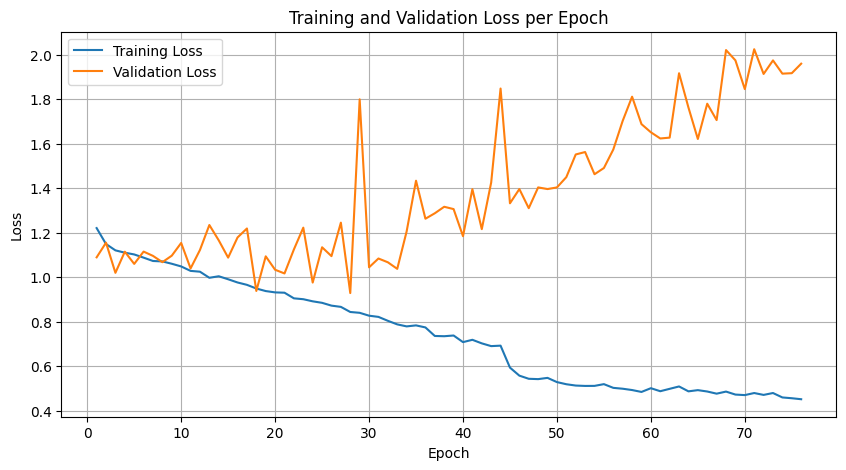

In [ ]:
# Plotting
plt.figure(figsize=(10, 5))
train_losses_tensor = torch.tensor(train_losses)  # Convert list back to tensor if needed
val_losses_tensor = torch.tensor(val_losses)
train_losses = train_losses_tensor.cpu().numpy()
val_losses = val_losses_tensor.cpu().numpy()
plt.plot(range(1, len(train_losses) + 1), train_losses, label='Training Loss')
plt.plot(range(1, len(val_losses) + 1), val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss per Epoch')
plt.legend()
plt.grid(True)
plt.show()


# THIS IS FOR LOADING BEST EPOCHS

apparently, the validation test will just test latest epoch, better to just test the earlier epochs. change accordingly

In [ ]:
# Create a new instance of the model
model = MymodelWithAttention(feature_size=80, h_dims=512, emotion_cls=train_dataset.NumClasses).to(device)

# Load the saved state_dict from epoch 57
model = torch.load('best_epoch_57.pt') # load a saved model
model.eval()  # Set the model to evaluation mode


MymodelWithAttention(
  (bn0): BatchNorm2d(80, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv_block1): ConvBlock5x5(
    (conv1): Conv2d(3, 64, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (conv_block2): ConvBlock5x5(
    (conv1): Conv2d(64, 128, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2), bias=False)
    (bn1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (conv_block3): ConvBlock5x5(
    (conv1): Conv2d(128, 256, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2), bias=False)
    (bn1): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (conv_block4): ConvBlock5x5(
    (conv1): Conv2d(256, 512, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2), bias=False)
    (bn1): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (lstm): LSTM

In [ ]:
# Evaluate the loaded model on the validation set
val_loss, val_UA, _, _, _ = test(model, device, 'val', val_loader, criterion_test, logger, train_dataset.ClassNames)
logger.info(f'Loaded model validation UA: {val_UA} after loading the model')


INFO:root:Testing on val
[2024-10-06 13:17:17,678][<ipython-input-138-2e04010a1dd1>][line:5][INFO] Testing on val
[2024-10-06 13:17:17,678][<ipython-input-138-2e04010a1dd1>][line:5][INFO] Testing on val
[2024-10-06 13:17:17,678][<ipython-input-138-2e04010a1dd1>][line:5][INFO] Testing on val
[2024-10-06 13:17:17,678][<ipython-input-138-2e04010a1dd1>][line:5][INFO] Testing on val
[2024-10-06 13:17:17,678][<ipython-input-138-2e04010a1dd1>][line:5][INFO] Testing on val
[2024-10-06 13:17:17,678][<ipython-input-138-2e04010a1dd1>][line:5][INFO] Testing on val
[2024-10-06 13:17:17,678][<ipython-input-138-2e04010a1dd1>][line:5][INFO] Testing on val
[2024-10-06 13:17:17,678][<ipython-input-138-2e04010a1dd1>][line:5][INFO] Testing on val
[2024-10-06 13:17:17,678][<ipython-input-138-2e04010a1dd1>][line:5][INFO] Testing on val
100%|██████████| 5/5 [00:08<00:00,  1.76s/it]
INFO:root:val: Average loss: 1.7030, Accuracy: 61.04%

[2024-10-06 13:17:26,482][<ipython-input-138-2e04010a1dd1>][line:37][INFO

In [ ]:
test_loss,test_UA,test_WA, embs, true_labels = test(model, device,'test', test_loader, criterion_test, logger, train_dataset.ClassNames)
logger.info('test UA: {}'.format(test_UA)) #unweighted average recall
torch.save(model, modelpath)

INFO:root:Testing on test
[2024-10-06 13:17:26,535][<ipython-input-138-2e04010a1dd1>][line:5][INFO] Testing on test
[2024-10-06 13:17:26,535][<ipython-input-138-2e04010a1dd1>][line:5][INFO] Testing on test
[2024-10-06 13:17:26,535][<ipython-input-138-2e04010a1dd1>][line:5][INFO] Testing on test
[2024-10-06 13:17:26,535][<ipython-input-138-2e04010a1dd1>][line:5][INFO] Testing on test
[2024-10-06 13:17:26,535][<ipython-input-138-2e04010a1dd1>][line:5][INFO] Testing on test
[2024-10-06 13:17:26,535][<ipython-input-138-2e04010a1dd1>][line:5][INFO] Testing on test
[2024-10-06 13:17:26,535][<ipython-input-138-2e04010a1dd1>][line:5][INFO] Testing on test
[2024-10-06 13:17:26,535][<ipython-input-138-2e04010a1dd1>][line:5][INFO] Testing on test
[2024-10-06 13:17:26,535][<ipython-input-138-2e04010a1dd1>][line:5][INFO] Testing on test
100%|██████████| 5/5 [00:08<00:00,  1.64s/it]
INFO:root:test: Average loss: 1.6862, Accuracy: 63.45%

[2024-10-06 13:17:34,772][<ipython-input-138-2e04010a1dd1>][li

Data successfully saved to label.csv.


## Plot TSNE on test set

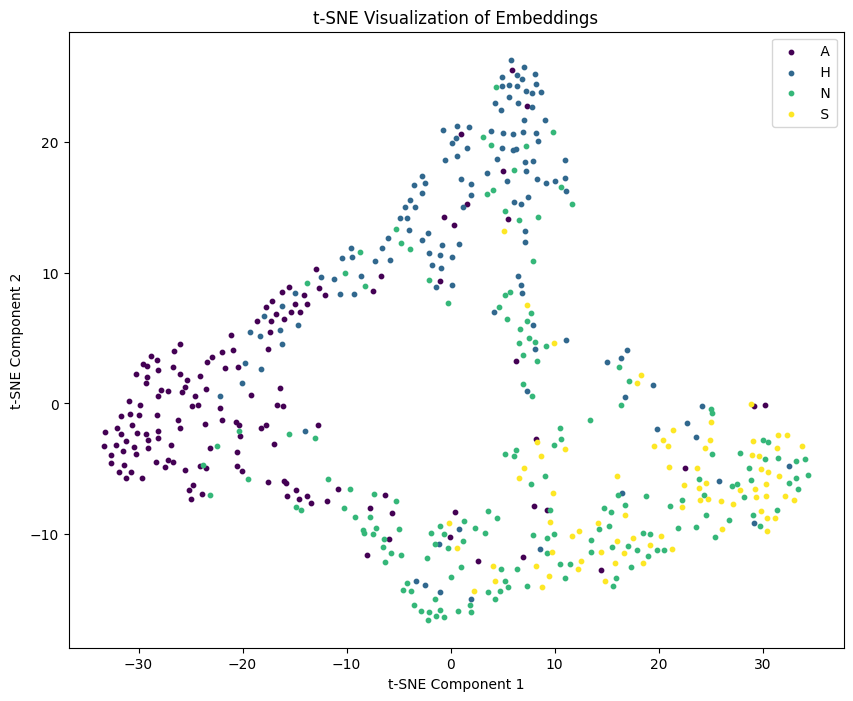

In [ ]:
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

# Assuming true_labels and embs are already defined
classname=test_set.get_classname()
# Encode labels
label_encoder = LabelEncoder()
true_labels_encoded = label_encoder.fit_transform(true_labels)

# Reduce dimensionality with t-SNE
tsne = TSNE(n_components=2, random_state=0)
embs_2d = tsne.fit_transform(embs)

# Define the color map and labels
cmap = plt.get_cmap('viridis', len(label_encoder.classes_))
labels = label_encoder.classes_

# Plotting
plt.figure(figsize=(10, 8))

# Plot each class separately
for i, label in enumerate(labels):
    idx = true_labels_encoded == i
    plt.scatter(embs_2d[idx, 0], embs_2d[idx, 1], c=[cmap(i)], label=f' {classname[label]}', s=10)

# Add the legend
plt.legend()
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.title('t-SNE Visualization of Embeddings')
plt.show()
